In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Provide the path to the uploaded file
file_path = r"E:\Excel Tutorial\Chapter - 10 - End to End Project using Excel.xlsm"

# If you know the sheet name, replace 'Sheet1' with your actual sheet name
df = pd.read_excel(file_path, sheet_name='RAW DATA', engine='openpyxl')

# Show first few rows
print(df.tail())

       Emp Code Sales Executive   Region  Day1  Day2  Day3  Day4  Day5  \
136  Mum-TCL137      Anil Kumar   Mumbai    73    67    49    56    43   
137  Mum-TCL138       Anikuttan    Delhi    72    49    93    95    73   
138  Mum-TCL139   Anamika Gupta   Nagpur    85    43    74    26    88   
139  Mum-TCL140    Afzal Husain  Chennai    77    81    10    65    83   
140  Mum-TCL141     Abdul Hamid     Pune    46    52    57    67    64   

     Total Sales  Target  Target Hit %  Away From Target %  
136          288     500         0.576               0.424  
137          382     500         0.764               0.236  
138          316     500         0.632               0.368  
139          316     500         0.632               0.368  
140          286     500         0.572               0.428  


In [3]:
df.dtypes

Emp Code               object
Sales Executive        object
Region                 object
Day1                    int64
Day2                    int64
Day3                    int64
Day4                    int64
Day5                    int64
Total Sales             int64
Target                  int64
Target Hit %          float64
Away From Target %    float64
dtype: object

In [4]:
df.describe()

,Day1,Day2,Day3,Day4,Day5,Total Sales,Target,Target Hit %,Away From Target %
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000
mean,56.184397,56.489362,52.361702,59.028369,52.141844,276.205674,500.0,0.552411,0.447589
std,25.198810,26.604677,27.547952,24.827963,25.021014,57.798976,0.0,0.115598,0.115598
min,10.000000,11.000000,10.000000,11.000000,10.000000,143.000000,500.0,0.286000,0.222000
25%,37.000000,34.000000,27.000000,36.000000,33.000000,229.000000,500.0,0.458000,0.364000
50%,55.000000,60.000000,49.000000,61.000000,49.000000,283.000000,500.0,0.566000,0.434000
75%,79.000000,79.000000,74.000000,80.000000,73.000000,318.000000,500.0,0.636000,0.542000
max,99.000000,99.000000,99.000000,99.000000,99.000000,389.000000,500.0,0.778000,0.714000


In [5]:
df.isnull().sum()

Emp Code              0
Sales Executive       0
Region                0
Day1                  0
Day2                  0
Day3                  0
Day4                  0
Day5                  0
Total Sales           0
Target                0
Target Hit %          0
Away From Target %    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Emp Code            141 non-null    object 
 1   Sales Executive     141 non-null    object 
 2   Region              141 non-null    object 
 3   Day1                141 non-null    int64  
 4   Day2                141 non-null    int64  
 5   Day3                141 non-null    int64  
 6   Day4                141 non-null    int64  
 7   Day5                141 non-null    int64  
 8   Total Sales         141 non-null    int64  
 9   Target              141 non-null    int64  
 10  Target Hit %        141 non-null    float64
 11  Away From Target %  141 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 13.3+ KB


In [7]:
group_by=df.groupby('Sales Executive')['Total Sales'].sum().reset_index()
group_by.head()

,Sales Executive,Total Sales
0,Abdul Hamid,286
1,Afzal Husain,316
2,Anamika Gupta,316
3,Anikuttan,382
4,Anil Kumar,288


In [8]:
top_sales_exec = group_by.sort_values(by='Total Sales', ascending=False).head(5)
print(top_sales_exec)

    Sales Executive  Total Sales
31  Jagdish Chandra          389
79   Rachita Anupam          385
59        Miny Mole          384
3         Anikuttan          382
15    Arvind Sharma          379


SelectMultiple(description='Select Execs', index=(0, 1, 2, 3), layout=Layout(border_bottom='2px solid orange',…

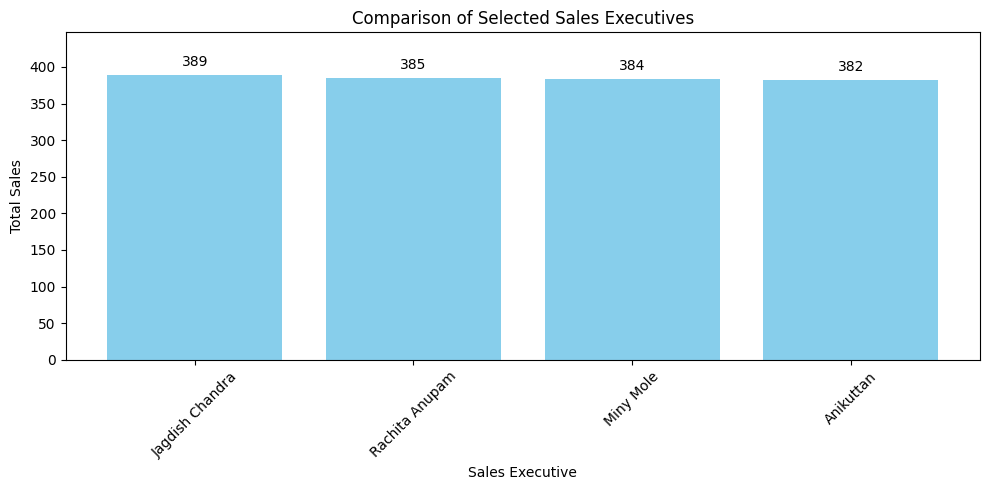

In [26]:
# plt.figure(figsize=(5,4))
# clr=['r','y','g','b',]
# bars=plt.bar(top_sales_exec['Sales Executive'],top_sales_exec['Total Sales'],color=clr)
# plt.xlabel("Sales Executive")
# plt.ylabel('Total Sales')
# plt.title('top 5 Sales Executive By Total Sales')
# plt.tight_layout()
# plt.xticks(rotation=45)
# for bar in bars:
#     height = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,  # x position
#         height,                             # y position
#         f'{height:,.0f}',                   # label text with comma separator
#         ha='center', va='bottom', fontsize=10
#     )
# plt.show()
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Limit top 20 records based on Total Sales
top_data = group_by.sort_values(by='Total Sales', ascending=False).head(20)

# Step 2: Create a styled SelectMultiple slicer
multi_select = widgets.SelectMultiple(
    options=top_data['Sales Executive'].tolist(),
    value=[top_data['Sales Executive'].iloc[0]],
    description='Select Execs',
    rows=10,
    style={'description_width': 'initial'},
    layout=widgets.Layout(
        width='50%',
        height='200px',
        border='2px solid orange',
        padding='10px'
    )
)

# Step 3: Define chart update function
def update_chart(change):
    clear_output(wait=True)
    display(multi_select)

    selected = list(multi_select.value)
    filtered = top_data[top_data['Sales Executive'].isin(selected)]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(filtered['Sales Executive'], filtered['Total Sales'], color='skyblue')
    plt.xlabel("Sales Executive")
    plt.ylabel("Total Sales")
    plt.title("Comparison of Selected Sales Executives")
    plt.xticks(rotation=45)

    # Y-axis limit for spacing above bars
    max_val = filtered['Total Sales'].max()
    plt.ylim(0, max_val * 1.15)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + (max_val * 0.02),
            f'{height:,.0f}',  # Format with commas
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

# Step 4: Add listener
multi_select.observe(update_chart, names='value')

# Step 5: Display slicer and chart
update_chart(None)


  






In [10]:
top_low=group_by.sort_values(by='Total Sales',ascending=False).tail(5)
top_low

,Sales Executive,Total Sales
74,Prabha Desikan,171
26,Dinesh Kumar,166
77,Praveen Kumar,166
72,Pankaj Shelkey,156
70,Omprakash O,143


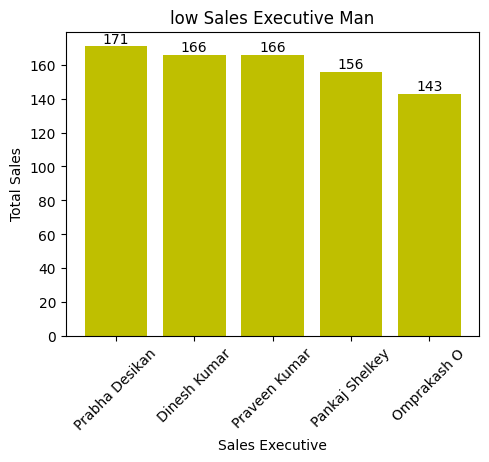

In [11]:
plt.figure(figsize=(5,4))
clr=['y']
bars=plt.bar(top_low['Sales Executive'],top_low['Total Sales'],color=clr)
plt.xlabel('Sales Executive')
plt.ylabel('Total Sales')
plt.title("low Sales Executive Man")
plt.tight_layout()
plt.xticks(rotation=45)
for bar in bars:
    height=bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                             # y position
        f'{height:,.0f}',                   # label text with comma separator
        ha='center', va='bottom', fontsize=10
    )
plt.show()

In [12]:
# Step 1: Group and sum
groupby = df.groupby('Sales Executive')['Target Hit %'].sum().reset_index()

# Step 2: Convert decimal to percentage with 2 decimals
groupby['Target Hit %'] = groupby['Target Hit %'] * 100

# Step 3: Format to two decimal places and add % sign
groupby['Target Hit %'] = groupby['Target Hit %'].map(lambda x: f'{x:.2f}%')

# Step 4: Sort and show top 5
print(groupby.sort_values(by='Target Hit %', ascending=False).head(5))


    Sales Executive Target Hit %
31  Jagdish Chandra       77.80%
79   Rachita Anupam       77.00%
59        Miny Mole       76.80%
3         Anikuttan       76.40%
15    Arvind Sharma       75.80%


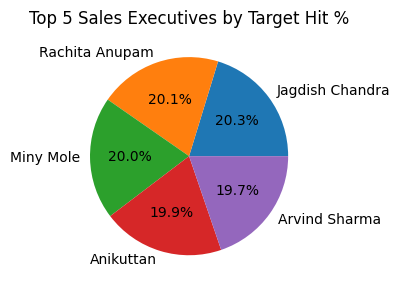

In [13]:
# Step 1: Remove % and convert back to float
groupby['Numeric Target'] = groupby['Target Hit %'].str.replace('%', '').astype(float)

# Step 2: Sort and take top 5
top5 = groupby.sort_values(by='Numeric Target', ascending=False).head(5)

# Step 3: Plot pie chart for top 5
plt.figure(figsize=(5, 3))
plt.pie(
    top5['Numeric Target'], 
    labels=top5['Sales Executive'], 
    autopct='%1.1f%%',
    colors=plt.cm.tab10.colors  # limited colors for 5 slices
)
plt.title('Top 5 Sales Executives by Target Hit %')
plt.tight_layout()
plt.show()



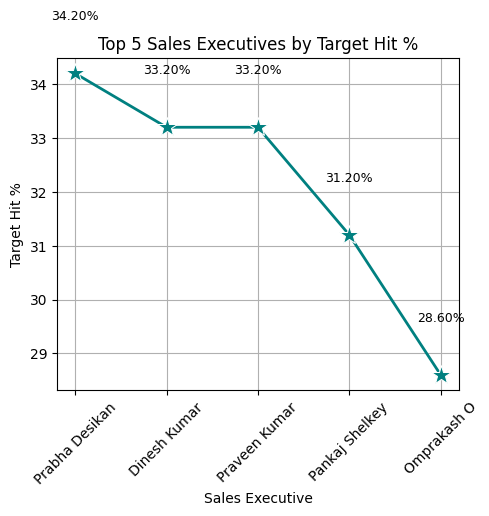

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert 'Target Hit %' from string to float
groupby['Numeric Target'] = groupby['Target Hit %'].str.replace('%', '').astype(float)

# Step 2: Get Top 5 performers
top5 = groupby.sort_values(by='Numeric Target', ascending=False).tail(5)

# Step 3: Plot line chart using seaborn
plt.figure(figsize=(5, 5))
sns.lineplot(
    data=top5,
    x='Sales Executive',
    y='Numeric Target',
    marker='*',
    markersize=15,
    linewidth=2,
    color='teal'
)

# Step 4: Customize plot
plt.title('Top 5 Sales Executives by Target Hit %')
plt.ylabel('Target Hit %')
plt.xlabel('Sales Executive')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Optional: Annotate values on points
for i in range(len(top5)):
    plt.text(
        x=top5['Sales Executive'].iloc[i],
        y=top5['Numeric Target'].iloc[i] + 1,
        s=f"{top5['Numeric Target'].iloc[i]:.2f}%",
        ha='center',
        fontsize=9
    )

plt.show()
